# Symbolic Gradient Calculation for SABR and SVI 
#### Dmitry Bazanov, Roland Grinis

In [2]:
import sympy as sym

## 1. SABR 

Implied volatility is given by:

$$ \sigma_B(x, T) \approx I_B^0(x) (1 + I_H^1(x)T), \quad x = \ln \frac{f}{K}$$

$$I_H^1(x) = \frac{\alpha^{2} \left(K f\right)^{\beta - 1} \left(1 - \beta\right)^{2}}{24} + \frac{\alpha \beta \rho v \left(K f\right)^{\frac{\beta}{2} - \frac{1}{2}}}{4} + \frac{v^{2} \cdot \left(2 - 3 \rho^{2}\right)}{24}$$

The order zero term is treated below.


In [4]:
alpha, beta, v, rho, f, K, T = sym.symbols('alpha beta v rho f K T')
x = sym.log(f/K)
I_H_1 = (((1 - beta)**2)*alpha**2/(24*(f*K)**(1 - beta)) + (rho*v*alpha*beta)/(4*(f*K)**((1-beta)/2)) + 
 ((2 - 3*rho**2)*v**2)/24 )

Derivatives of $I_H^1(x)$:

In [6]:
I_H_1.diff(alpha) # vega
I_H_1.diff(rho) # rega
I_H_1.diff(v) # sega
I_H_1.diff(f) # delta
I_H_1.diff(f).diff(f) # gamma
I_H_1.diff(f).diff(alpha) # gamma, vanna, volga
I_H_1.diff(alpha).diff(alpha) # volga
I_H_1.diff(K); # map to delta space

Derivatives of $I_H^0(x)$:

$\textbf{Case 1}: x = 0$ 

In [7]:
I_B_x = alpha*K**(beta-1)
I_B_x

K**(beta - 1)*alpha

In [8]:
I_B_x.diff(alpha) # vega
I_B_x.diff(rho) # rega
I_B_x.diff(v) # sega
I_B_x.diff(f) # delta
I_B_x.diff(f).diff(f) # gamma
I_B_x.diff(f).diff(alpha) # gamma, vanna, volga
I_B_x.diff(alpha).diff(alpha) # volga
sym.simplify(I_B_x.diff(K)); # map to delta space

$\textbf{Case 2}: v = 0$ 

In [9]:
I_B_v = x*alpha*(1 - beta)/(f**(1 - beta) - K**(1 - beta))
I_B_v

alpha*(1 - beta)*log(f/K)/(-K**(1 - beta) + f**(1 - beta))

In [10]:
I_B_v.diff(alpha).subs(x, "x") # vega
I_B_v.diff(rho) # rega
I_B_v.diff(v) # sega
sym.simplify(I_B_v.diff(f).subs(x, "x")) # delta
sym.simplify(I_B_v.diff(f).diff(f).subs(x, "x")) # gamma
I_B_v.diff(f).diff(alpha).subs(x, "x") # gamma, vanna, volga
I_B_v.diff(alpha).diff(alpha) # volga
sym.simplify(I_B_v.diff(K).subs(x, "x")); # map to delta space

$\textbf{Case 3}: \beta = 1$

In [11]:
z_b = v*x/alpha
xi_b = sym.sqrt(- 2*rho*z_b+z_b**2+1 )
I_B_b = v*x/sym.ln((xi_b + z_b - rho)/(1 - rho))
I_B_b

v*log(f/K)/log((-rho + sqrt(1 - 2*rho*v*log(f/K)/alpha + v**2*log(f/K)**2/alpha**2) + v*log(f/K)/alpha)/(1 - rho))

In [12]:
# vega
sym.simplify(I_B_b.diff(alpha).subs(xi_b, sym.Symbol(r"\xi")).subs(z_b, "z").subs(x, "x"))
# rega
sym.simplify(I_B_b.diff(rho).subs(xi_b, sym.Symbol(r"\xi")).subs(z_b, "z").subs(x, "x"))
# sega
sym.simplify(I_B_b.diff(v).subs(xi_b, sym.Symbol(r"\xi")).subs(z_b, "z").subs(x, "x"))
# delta
sym.simplify(I_B_b.diff(f).subs(xi_b, sym.Symbol(r"\xi")).subs(z_b, "z").subs(x, "x"))
# gamma
sym.simplify(I_B_b.diff(f).diff(f).subs(xi_b, sym.Symbol(r"\xi")).subs(z_b, "z").subs(x, "x"))
# gamma, vanna, volga
sym.simplify(I_B_b.diff(f).diff(alpha).subs(xi_b, sym.Symbol(r"\xi")).subs(z_b, "z").subs(x, "x"))
# volga
sym.simplify(I_B_b.diff(alpha).diff(alpha).subs(xi_b, sym.Symbol(r"\xi")).subs(z_b, "z").subs(x, "x"))
# map to delta space
sym.simplify(I_B_b.diff(K).subs(xi_b, sym.Symbol(r"\xi")).subs(z_b, "z").subs(x, "x"));

$\textbf{Case 4}: \beta < 1$

In [13]:
z = v*(f**(1 - beta) - K**(1 - beta))/(alpha * (1 - beta))
xi = sym.sqrt(- 2*rho*z+z**2+1 )
I_B_0 = v*x/sym.ln((xi + z - rho)/(1 - rho))
I_B_0

v*log(f/K)/log((-rho + sqrt(1 - 2*rho*v*(-K**(1 - beta) + f**(1 - beta))/(alpha*(1 - beta)) + v**2*(-K**(1 - beta) + f**(1 - beta))**2/(alpha**2*(1 - beta)**2)) + v*(-K**(1 - beta) + f**(1 - beta))/(alpha*(1 - beta)))/(1 - rho))

In [14]:
# vega
sym.simplify(I_B_0.diff(alpha).subs(xi, sym.Symbol(r"\xi")).subs(z, "z").subs(x, "x"))
# rega
sym.simplify(I_B_0.diff(rho).subs(xi, sym.Symbol(r"\xi")).subs(z, "z").subs(x, "x"))
# sega
sym.simplify(I_B_0.diff(v).subs(xi, sym.Symbol(r"\xi")).subs(z, "z").subs(x, "x"))
# delta
sym.simplify(I_B_0.diff(f).subs(xi, sym.Symbol(r"\xi")).subs(z, "z").subs(x, "x"))
# gamma
sym.simplify(I_B_0.diff(f).diff(f).subs(xi, sym.Symbol(r"\xi")).subs(z, "z").subs(x, "x"))
# gamma, vanna, volga
sym.simplify(I_B_0.diff(f).diff(alpha).subs(xi, sym.Symbol(r"\xi")).subs(z, "z").subs(x, "x"))
# volga
sym.simplify(I_B_0.diff(alpha).diff(alpha).subs(xi, sym.Symbol(r"\xi")).subs(z, "z").subs(x, "x"))
# map to delta space
sym.simplify(I_B_0.diff(K).subs(xi, sym.Symbol(r"\xi")).subs(z, "z").subs(x, "x"));

Implied volatility senstivities are easy to obtain:
$$ \nabla_{\alpha, \rho, v, f, K} \sigma_B(x, T) =  \nabla_{\alpha, \rho, v, f, K} I_B^0(x) \cdot \left(1 + I_H^1(x)T \right) + I_B^0(x) \cdot T \cdot \nabla_{\alpha, \rho, v, f, K}I_H^1(x)
$$

$$
\nabla_{\alpha, f}^2 \sigma_B= \nabla_{\alpha, f}^2 I_B^0(x) + T\left( \nabla_{\alpha,f}^2 I_B^0(x) \cdot I_H^1(x) +  \nabla_{\alpha, f}^2  I_H^1(x) \cdot I_B^0(x)  + 2 \nabla_{\alpha, f} I_B^0(x) \cdot \nabla_{\alpha, f} I_H^1(x) \right)
$$

$$ \frac{\partial ^2 \sigma_B}{\partial \alpha \partial f} = \frac{\partial^2 I_B^0(x)}{\partial \alpha \partial f} (1 + I_H^1(x)T) + \frac{\partial I_B^0(x)}{\partial \alpha} \frac{\partial I_H^1(x)}{\partial f}T + \frac{\partial^2 I_H^1(x)}{\partial \alpha \partial f} I_B^0(x) T +\frac{\partial I_H^1(x)}{\partial \alpha} \frac{\partial I_B^0(x)}{\partial f}T $$

## 2. SVI
Raw parametrization:

$$ w(k, X_R) = a + b\{\rho(k - m) + \sqrt{(k - m)^2 + \sigma^2} \}$$

In [9]:
a, b, rho, m, sigma, f, K, T = sym.symbols('a b rho m sigma f K T')
k = sym.log(K/f)
w = a + b *(rho*(k - m) + sym.sqrt((k-m)**2 + sigma**2)) #total iv
v = sym.sqrt(w/T) # iv

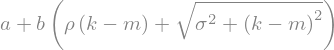

In [10]:
w.subs(k, "k")

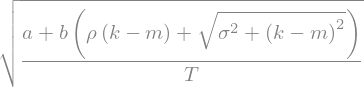

In [11]:
v.subs(k, "k")

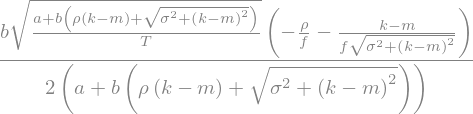

In [12]:
v.diff(f).subs(k, "k")

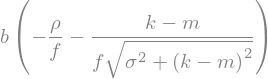

In [13]:
#delta
w.diff(f).subs(k, "k")# sym.sqrt(T*w)

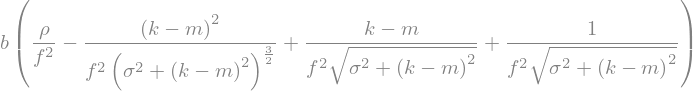

In [14]:
#gamma
w.diff(f).diff(f).subs(k, "k")

In [15]:
# a
w.diff(a).subs(k, "k")

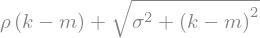

In [16]:
# b
w.diff(b).subs(k, "k")

In [17]:
# rho
w.diff(rho).subs(k, "k")

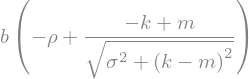

In [18]:
# m
w.diff(m).subs(k, "k")

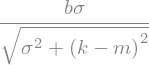

In [19]:
# sigma
w.diff(sigma).subs(k, "k")

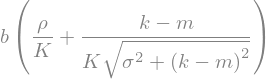

In [20]:
# K
w.diff(K).subs(k, "k")

In [4]:
import torch

In [5]:
from pyquant.torch_spline import CubicSpline1D

In [7]:
y = torch.tensor([1.40286434, 1.07977775, 0.88064766, 0.65471368, 0.54875586,
       0.53543347, 0.68346774, 0.79146338, 0.90117135, 1.07876289], requires_grad=True)
x = torch.tensor([1300., 1400, 1500, 1600, 1700, 1800., 1900, 2000, 2100, 2200])

In [8]:
spline = CubicSpline1D(x,y)

In [9]:
xs = torch.linspace(x[0], x[-1], 100)

In [12]:
l = spline.evaluate(xs).flatten()
l

tensor([1.4029, 1.3701, 1.3376, 1.3054, 1.2736, 1.2426, 1.2124, 1.1832, 1.1551,
        1.1285, 1.1033, 1.0798, 1.0580, 1.0379, 1.0190, 1.0011, 0.9840, 0.9673,
        0.9507, 0.9341, 0.9170, 0.8993, 0.8806, 0.8608, 0.8401, 0.8186, 0.7967,
        0.7747, 0.7528, 0.7313, 0.7105, 0.6906, 0.6719, 0.6547, 0.6392, 0.6253,
        0.6129, 0.6018, 0.5919, 0.5830, 0.5749, 0.5677, 0.5610, 0.5547, 0.5488,
        0.5430, 0.5376, 0.5327, 0.5286, 0.5253, 0.5231, 0.5223, 0.5229, 0.5251,
        0.5293, 0.5354, 0.5437, 0.5540, 0.5659, 0.5791, 0.5933, 0.6083, 0.6236,
        0.6392, 0.6545, 0.6694, 0.6835, 0.6966, 0.7087, 0.7199, 0.7304, 0.7402,
        0.7495, 0.7584, 0.7669, 0.7752, 0.7833, 0.7915, 0.7997, 0.8080, 0.8166,
        0.8255, 0.8347, 0.8443, 0.8545, 0.8652, 0.8764, 0.8884, 0.9012, 0.9147,
        0.9290, 0.9439, 0.9595, 0.9756, 0.9921, 1.0090, 1.0262, 1.0436, 1.0611,
        1.0788], grad_fn=<ViewBackward0>)

In [14]:
v = torch.autograd.grad(l.sum(), y)